In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('D:\\train_motion_data.csv')
test= pd.read_csv('D:\\test_motion_data.csv')

In [3]:
data

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [5]:
data.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


In [6]:
data.isna().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [7]:
data.dtypes

AccX         float64
AccY         float64
AccZ         float64
GyroX        float64
GyroY        float64
GyroZ        float64
Class         object
Timestamp      int64
dtype: object

In [8]:
data['Class'].value_counts()

SLOW          1331
NORMAL        1200
AGGRESSIVE    1113
Name: Class, dtype: int64

In [9]:
data['Class'] = data['Class'].replace({'SLOW'       : 0,
                                       'NORMAL'     : 1,
                                       'AGGRESSIVE' : 2})

In [10]:
test['Class'] = test['Class'].replace({'SLOW'       : 0,
                                       'NORMAL'     : 1,
                                       'AGGRESSIVE' : 2})

<AxesSubplot:>

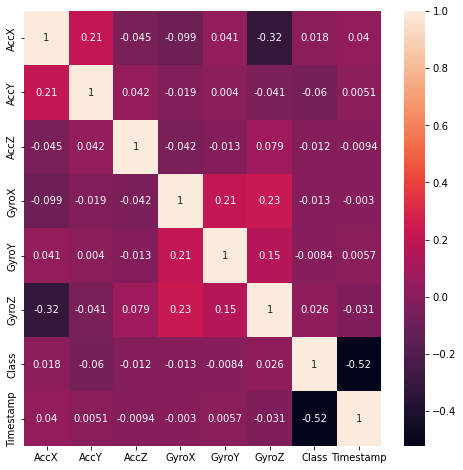

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

In [12]:
def preprocess_inputs(df):
    df = df.copy()
    df['Timestamp'] = df['Timestamp']/60 
    
    y = df['Class']
    X = df.drop('Class',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, shuffle=True, random_state=43)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns, index=X_test.index)    
    
    return X_train, X_test, y_train, y_test

In [13]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

X_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
2229,-0.928054,-0.571557,-1.905594,1.452378,-0.953414,-0.644284,0.316336
410,0.454953,-0.288627,1.263985,1.631730,1.447092,0.092007,-1.321990
103,-1.075432,0.163600,-0.972211,1.085523,-0.028407,0.197879,-1.574393
480,-0.444155,1.367620,-0.503692,-0.210700,1.550874,0.313376,-1.263861
2292,-0.103977,-1.995929,-1.508127,-1.327572,1.334287,-1.000398,0.368347
...,...,...,...,...,...,...,...
2106,-2.827428,-2.108113,1.737966,-1.262353,-0.858657,1.078541,0.215375
2325,0.851350,-0.359115,-0.406268,-0.553099,-1.115854,-0.841591,0.515200
2303,-0.639628,0.026431,0.158376,1.623577,-0.105115,3.903396,0.377525
3392,0.337663,0.362266,-0.907431,0.343659,-0.014870,-0.278544,1.440678


In [14]:
models = {
    '        Logistic Regression' : LogisticRegression(),
    '              Decision Tree' : DecisionTreeClassifier(),
    '              Random Forest' : RandomForestClassifier(),
    '             Neural Network' : MLPClassifier(),
    '                 K-Neighbors': KNeighborsClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    '          Bagging Classifier': BaggingClassifier(),
    '                  Linear SVM': LinearSVC(),
    '                  Kernel SVM': SVC()    
}

for name, model in models.items():
    model = model.fit(X_train,y_train)
    print(name + " trained")

        Logistic Regression trained
              Decision Tree trained
              Random Forest trained
             Neural Network trained
                 K-Neighbors trained
Gradient Boosting Classifier trained
          Bagging Classifier trained
                  Linear SVM trained
                  Kernel SVM trained


In [15]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

        Logistic Regression: 99.84%
              Decision Tree: 100.00%
              Random Forest: 99.96%
             Neural Network: 99.53%
                 K-Neighbors: 89.26%
Gradient Boosting Classifier: 100.00%
          Bagging Classifier: 100.00%
                  Linear SVM: 99.02%
                  Kernel SVM: 96.82%
